## PUI 2016 Final Exam - Ozgur L. Akkas NYU ID: oa691
Theme: NYC Socioeconomic Characteristics and Diversity Between the Years 2000 and 2010

Note: Links and files were uploaded to the folder this file is saved for producible the results

In [1]:
import pandas as pd
import json
import os
import pylab as pl
import geopandas as gp
import glob
import zipfile
from sklearn.cluster import KMeans
from descartes import PolygonPatch
import scipy.cluster as scp
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster as scp
import pandas as pd
from pandas.io.common import ZipFile
import pylab as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
%matplotlib inline


%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### JSON Census Files for Demographics

In [21]:
#Given Json
census00 = pd.read_json("Final/census00_final.json")
census10 = pd.read_json("Final/census10_final.json")

In [24]:
# removing left side of geo_id for later merging via "Geo_FIPS"
# from "400000US36047054300" to obtain the part after 'US'
census00['left_side'], census00['Geo_FIPS'] = census00['geo_id'].str.split("US").str
census10['left_side'], census10['Geo_FIPS'] = census10['geo_id'].str.split("US").str

In [25]:
census00 = census00[['Geo_FIPS', 'age', 'diversity', 'income', 'population']]
census10 = census10[['Geo_FIPS', 'age', 'diversity', 'income', 'population']]

In [26]:
census00['Geo_FIPS'] = census00['Geo_FIPS'].astype(int)
census10['Geo_FIPS'] = census10['Geo_FIPS'].astype(int)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
census00.set_index('Geo_FIPS', inplace=True)
census10.set_index('Geo_FIPS', inplace=True)

In [28]:
census00.head()

age  diversity   income  population
Geo_FIPS                                         
36047054300   0.0        NaN      NaN           0
36081121100   0.0        NaN      NaN           0
36029001401  47.5       34.0  18125.0         106
36001001901  39.3       89.2  52093.0        2656
36029013800  40.9       98.7  55842.0        7663

In [29]:
census10.head()

age  diversity   income  population
Geo_FIPS                                         
36081038301   0.0        NaN      NaN           0
36005002400  38.0       50.0      NaN           4
36047053700  16.4       98.7  30938.0        3575
36001013300  33.5       82.4  40513.0        4427
36029014803  44.5       97.4  58455.0        6028

#### Prepraing for Merge with NYC Shape File

In [32]:
ct_data = pd.read_csv('Final/ACS_CT2010.csv')
ct_data.index=ct_data.BoroCT2010.astype(str)

In [33]:
ct_data.head()

FID  BoroCT2010             Geo_NAME  \
BoroCT2010                                         
5000900       0     5000900       Census Tract 9   
5012500       1     5012500     Census Tract 125   
5013301       2     5013301  Census Tract 133.01   
5019700       3     5019700     Census Tract 197   
5002002       4     5002002   Census Tract 20.02   

                                                 Geo_QName     Geo_FIPS  \
BoroCT2010                                                                
5000900          Census Tract 9, Richmond County, New York  36085000900   
5012500        Census Tract 125, Richmond County, New York  36085012500   
5013301     Census Tract 133.01, Richmond County, New York  36085013301   
5019700        Census Tract 197, Richmond County, New York  36085019700   
5002002      Census Tract 20.02, Richmond County, New York  36085002002   

            Geo_SUMLEV  Geo_GEOCOMP  Geo_STATE  Geo_COUNTY  Geo_COUNTYSC  \
BoroCT2010                                                                 
5000900            140            0         36          85            19   
5012500            140            0         36          85            19   
5013301            140            0         36          85            19   
5019700            140            0         36          85            19   
5002002            140            0         36          85            19   

               ...       SE_T017_017  SE_T017_018  SE_T017_019  SE_T017_020  \
BoroCT2010     ...                                                            
5000900        ...                32           23           13           12   
5012500        ...                50           50           28           33   
5013301        ...                 0           11            6            3   
5019700        ...                48           56           36           50   
5002002        ...                73          126           53           73   

            SE_T017_021  SE_T017_022  SE_T017_023  SE_T017_024  SE_T017A001  \
BoroCT2010                                                                    
5000900              10           12           11            7          746   
5012500              36           32           42           20         1522   
5013301              15            4            4            4          303   
5019700              54           32           44           36         1672   
5002002             114           83           63           63         2562   

            SE_T017A002  
BoroCT2010               
5000900              50  
5012500              89  
5013301              24  
5019700              97  
5002002             104  

[5 rows x 258 columns]

In [34]:
ct_data = ct_data[['Geo_FIPS']]

In [35]:
ct_data.head()

Geo_FIPS
BoroCT2010             
5000900     36085000900
5012500     36085012500
5013301     36085013301
5019700     36085019700
5002002     36085002002

In [36]:
np.random.choice(ct_data.Geo_FIPS, 20)

array([36047058400, 36047057800, 36047045600, 36061022600, 36081085700,
       36081039900, 36085015100, 36081055600, 36047047000, 36047057800,
       36061000500, 36047022000, 36081027600, 36005003500, 36005028700,
       36005022101, 36061024700, 36061015500, 36005007100, 36047041500])

#### Census CT Shapefile 

In [39]:
ct_shape = gp.GeoDataFrame.from_file("Final/CT_Shape/ct_shape.shp")
ct_shape.index=ct_shape.BoroCT2010

In [40]:
ct_shape.head

<bound method GeoDataFrame.head of            BoroCT2010 BoroCode       BoroName CDEligibil  CT2010  CTLabel  \
BoroCT2010                                                                  
5000900       5000900        5  Staten Island          I  000900        9   
5012500       5012500        5  Staten Island          I  012500      125   
5013301       5013301        5  Staten Island          E  013301   133.01   
5019700       5019700        5  Staten Island          I  019700      197   
5002002       5002002        5  Staten Island          I  002002    20.02   
5006400       5006400        5  Staten Island          I  006400       64   
5007400       5007400        5  Staten Island          I  007400       74   
5018701       5018701        5  Staten Island          I  018701   187.01   
1002202       1002202        1      Manhattan          I  002202    22.02   
1003200       1003200        1      Manhattan          I  003200       32   
1006800       1006800        1      Manha

#### Uploading NYC Shapefile

In [43]:
#Pulled it from the Final folder after download
nyc_shape = gp.GeoDataFrame.from_file("Final/ZIP_CODE_040114.shp")

In [44]:
nyc_shape = nyc_shape.assign(zipcode=nyc_shape.ZIPCODE)

In [45]:
nyc_shape.head()

AREA BLDGZIP  COUNTY CTY_FIPS  POPULATION   PO_NAME  SHAPE_AREA  \
0  2.269930e+07       0  Queens      081     18681.0   Jamaica         0.0   
1  2.963100e+07       0   Kings      047     62426.0  Brooklyn         0.0   
2  4.197210e+07       0   Kings      047     83866.0  Brooklyn         0.0   
3  2.369863e+07       0   Kings      047     56527.0  Brooklyn         0.0   
4  3.686880e+07       0   Kings      047     72280.0  Brooklyn         0.0   

   SHAPE_LEN STATE ST_FIPS                   URL ZIPCODE  \
0        0.0    NY      36  http://www.usps.com/   11436   
1        0.0    NY      36  http://www.usps.com/   11213   
2        0.0    NY      36  http://www.usps.com/   11212   
3        0.0    NY      36  http://www.usps.com/   11225   
4        0.0    NY      36  http://www.usps.com/   11218   

                                            geometry zipcode  
0  POLYGON ((1038098.251871482 188138.3800067157,...   11436  
1  POLYGON ((1001613.712964058 186926.4395172149,...   11213  
2  POLYGON ((1011174.275535807 183696.33770971, 1...   11212  
3  POLYGON ((995908.3654508889 183617.6128015518,...   11225  
4  POLYGON ((991997.1134308875 176307.4958601296,...   11218

In [46]:
nyc_shape.ZIPCODE = nyc_shape.ZIPCODE.astype(int)

In [48]:
nyc_shape.dtypes

AREA          float64
BLDGZIP        object
COUNTY         object
CTY_FIPS       object
POPULATION    float64
PO_NAME        object
SHAPE_AREA    float64
SHAPE_LEN     float64
STATE          object
ST_FIPS        object
URL            object
ZIPCODE         int64
geometry       object
zipcode        object
dtype: object

#### Uploading ZipCode Tabulation Areas from US Census 
https://www.census.gov/geo/maps-data/data/relationship.html

In [52]:
zcta = pd.read_csv("Final/zcta_tract_rel_10.txt")

In [54]:
zcta_ny = zcta.query('STATE==36')

zcta_ny = zcta_ny.assign(zipcode=zcta_ny.ZCTA5, Geo_FIPS=zcta_ny.GEOID)
zcta_ny = zcta_ny[['zipcode', 'Geo_FIPS']]
zcta_ny.set_index('Geo_FIPS', inplace=True)

In [55]:
zcta_ny.head()

zipcode
Geo_FIPS            
36103170202     6390
36061005800    10001
36061007600    10001
36061009100    10001
36061009300    10001

In [56]:
ct_final = ct_shape.join(ct_data)

In [57]:
ct_final.set_index('Geo_FIPS', inplace=True)

In [58]:
ct_zcta = ct_final.join(zcta_ny)

In [59]:
ct_zcta.head()

BoroCT2010 BoroCode BoroName CDEligibil  CT2010 CTLabel NTACode  \
Geo_FIPS                                                                      
36005000100    2000100        2    Bronx          I  000100       1    BX98   
36005000200    2000200        2    Bronx          I  000200       2    BX09   
36005000400    2000400        2    Bronx          I  000400       4    BX09   
36005001600    2001600        2    Bronx          E  001600      16    BX09   
36005001900    2001900        2    Bronx          E  001900      19    BX39   

                                                     NTAName  PUMA  \
Geo_FIPS                                                             
36005000100                                    Rikers Island  3710   
36005000200  Soundview-Castle Hill-Clason Point-Harding Park  3709   
36005000400  Soundview-Castle Hill-Clason Point-Harding Park  3709   
36005001600  Soundview-Castle Hill-Clason Point-Harding Park  3709   
36005001900                           Mott Haven-Port Morris  3710   

               Shape_Area    Shape_Leng  \
Geo_FIPS                                  
36005000100  1.815460e+07  18903.346859   
36005000200  5.051756e+06  15895.406084   
36005000400  8.550000e+06  24591.989419   
36005001600  5.221332e+06   9671.306282   
36005001900  1.796448e+07  29989.844937   

                                                      geometry  zipcode  
Geo_FIPS                                                                 
36005000100  POLYGON ((-73.87287195903876 40.78597502780473...  11370.0  
36005000200  POLYGON ((-73.85651604096795 40.80524122047595...  10473.0  
36005000400  (POLYGON ((-73.85114472260702 40.8143965488759...  10473.0  
36005001600  POLYGON ((-73.85513639815335 40.82243618931001...  10473.0  
36005001900  (POLYGON ((-73.89680883223774 40.7958084451597...  10454.0

In [60]:
df1 = ct_zcta.join(census00)

In [62]:
# Getting 000 and 2010 data is on the left, as 00, 10
df = df1.join(census10, lsuffix="00", rsuffix="10")

In [63]:
df = df.assign(age_diff = df.age10-df.age00,
               diversity_diff = df.diversity10-df.diversity00,
               income_diff = df.income10-df.income00,
               population_diff = df.population10-df.population00)

In [64]:
print df.columns

Index([     u'BoroCT2010',        u'BoroCode',        u'BoroName',
            u'CDEligibil',          u'CT2010',         u'CTLabel',
               u'NTACode',         u'NTAName',            u'PUMA',
            u'Shape_Area',      u'Shape_Leng',        u'geometry',
               u'zipcode',           u'age00',     u'diversity00',
              u'income00',    u'population00',           u'age10',
           u'diversity10',        u'income10',    u'population10',
              u'age_diff',  u'diversity_diff',     u'income_diff',
       u'population_diff'],
      dtype='object')


In [65]:
df.head()

BoroCT2010 BoroCode BoroName CDEligibil  CT2010 CTLabel NTACode  \
Geo_FIPS                                                                      
36005000100    2000100        2    Bronx          I  000100       1    BX98   
36005000200    2000200        2    Bronx          I  000200       2    BX09   
36005000400    2000400        2    Bronx          I  000400       4    BX09   
36005001600    2001600        2    Bronx          E  001600      16    BX09   
36005001900    2001900        2    Bronx          E  001900      19    BX39   

                                                     NTAName  PUMA  \
Geo_FIPS                                                             
36005000100                                    Rikers Island  3710   
36005000200  Soundview-Castle Hill-Clason Point-Harding Park  3709   
36005000400  Soundview-Castle Hill-Clason Point-Harding Park  3709   
36005001600  Soundview-Castle Hill-Clason Point-Harding Park  3709   
36005001900                           Mott Haven-Port Morris  3710   

               Shape_Area       ...         income00 population00  age10  \
Geo_FIPS                        ...                                        
36005000100  1.815460e+07       ...              NaN      12780.0   31.3   
36005000200  5.051756e+06       ...          42539.0       3545.0   33.9   
36005000400  8.550000e+06       ...          39013.0       3314.0   34.1   
36005001600  5.221332e+06       ...          24552.0       5237.0   35.0   
36005001900  1.796448e+07       ...              NaN          NaN   30.6   

             diversity10  income10  population10  age_diff  diversity_diff  \
Geo_FIPS                                                                     
36005000100         15.5       NaN         11091      -0.8             3.1   
36005000200         30.7   59826.0          4334       1.2            -1.3   
36005000400         27.2   71968.0          5503       1.4            -8.9   
36005001600         27.6   30355.0          5643       1.7            -6.9   
36005001900         30.8   25093.0          1917       NaN             NaN   

             income_diff  population_diff  
Geo_FIPS                                   
36005000100          NaN          -1689.0  
36005000200      17287.0            789.0  
36005000400      32955.0           2189.0  
36005001600       5803.0            406.0  
36005001900          NaN              NaN  

[5 rows x 25 columns]

#### Aggregating Data at Zipcode Level

In [66]:
df_zip_group = df.groupby(['zipcode'])[['age00', 'diversity00', 'income00',    u'population00', u'age10',
                                        u'diversity10', u'income10', u'population10',
                                        u'age_diff', u'diversity_diff',u'income_diff', u'population_diff']].mean()

In [67]:
df_zip_group.head()

age00  diversity00      income00  population00      age10  \
zipcode                                                                  
10001.0  37.045455    67.100000  55916.636364   2734.363636  35.118182   
10002.0  37.346667    35.333333  24638.933333   6002.000000  39.733333   
10003.0  33.830769    78.607692  67541.846154   5319.538462  32.653846   
10004.0  25.428571    75.916667  84783.600000   1116.285714  32.612500   
10005.0  29.100000    71.600000  87019.333333   1985.000000  29.033333   

         diversity10       income10  population10  age_diff  diversity_diff  \
zipcode                                                                       
10001.0    64.836364   92754.909091   3450.090909 -1.927273       -2.263636   
10002.0    39.680000   39449.400000   5702.266667  2.386667        4.346667   
10003.0    77.446154   93893.846154   5525.461538 -1.176923       -1.161538   
10004.0    55.914286  122729.200000   3310.625000  6.642857       -5.960000   
10005.0    73.466667  116870.333333   5438.666667 -0.066667        1.866667   

          income_diff  population_diff  
zipcode                                 
10001.0  36838.272727       715.727273  
10002.0  14810.466667      -299.733333  
10003.0  26352.000000       205.923077  
10004.0  29791.000000      1856.285714  
10005.0  29851.000000      3453.666667

In [68]:
df_zip_group.shape

(214, 12)

In [69]:
tmp_ct = ct_zcta
tmp_ct.set_index('zipcode', inplace=True)

In [70]:
df_zip = tmp_ct.join(df_zip_group)

In [71]:
df_zip.head()

BoroCT2010 BoroCode   BoroName CDEligibil  CT2010 CTLabel NTACode  \
zipcode                                                                     
10001.0    1005800        1  Manhattan          I  005800      58    MN13   
10001.0    1007600        1  Manhattan          I  007600      76    MN17   
10001.0    1009100        1  Manhattan          I  009100      91    MN13   
10001.0    1009300        1  Manhattan          I  009300      93    MN13   
10001.0    1009500        1  Manhattan          I  009500      95    MN17   

                                            NTAName  PUMA    Shape_Area  \
zipcode                                                                   
10001.0  Hudson Yards-Chelsea-Flatiron-Union Square  3807  1.879714e+06   
10001.0                       Midtown-Midtown South  3807  1.873515e+06   
10001.0  Hudson Yards-Chelsea-Flatiron-Union Square  3807  1.927017e+06   
10001.0  Hudson Yards-Chelsea-Flatiron-Union Square  3807  1.929507e+06   
10001.0                       Midtown-Midtown South  3807  1.851216e+06   

              ...             income00 population00      age10  diversity10  \
zipcode       ...                                                             
10001.0       ...         55916.636364  2734.363636  35.118182    64.836364   
10001.0       ...         55916.636364  2734.363636  35.118182    64.836364   
10001.0       ...         55916.636364  2734.363636  35.118182    64.836364   
10001.0       ...         55916.636364  2734.363636  35.118182    64.836364   
10001.0       ...         55916.636364  2734.363636  35.118182    64.836364   

             income10  population10  age_diff  diversity_diff   income_diff  \
zipcode                                                                       
10001.0  92754.909091   3450.090909 -1.927273       -2.263636  36838.272727   
10001.0  92754.909091   3450.090909 -1.927273       -2.263636  36838.272727   
10001.0  92754.909091   3450.090909 -1.927273       -2.263636  36838.272727   
10001.0  92754.909091   3450.090909 -1.927273       -2.263636  36838.272727   
10001.0  92754.909091   3450.090909 -1.927273       -2.263636  36838.272727   

         population_diff  
zipcode                   
10001.0       715.727273  
10001.0       715.727273  
10001.0       715.727273  
10001.0       715.727273  
10001.0       715.727273  

[5 rows x 24 columns]

#### Adding Business Density to Zip Level: zbs files were initially downloaded using these ftp links. It's runs easier when saved in a folder

In [74]:
df00 = pd.read_csv('Final/zbp00totals.txt')

df00 = df00[['ZIP', 'NAME', 'EST']]
df00=df00.rename(index=str, columns = {'ZIP':'ZIPCODE', 'NAME': 'NAME00', 'EST':'EST00'})
df00.head()

ZIPCODE          NAME00  EST00
0      501  HOLTSVILLE, NY      1
1     1001      AGAWAM, MA    493
2     1002     AMHERST, MA    563
3     1003     AMHERST, MA     13
4     1004     AMHERST, MA     48

In [76]:
df10 = pd.read_csv('Final/zbp10totals.txt')

df10 = df10[['zip', 'est']]
df10=df10.rename(index=str, columns = {'zip':'ZIPCODE', 'est':'EST10'})
df10.head()

ZIPCODE  EST10
0      501      2
1     1001    448
2     1002    570
3     1003     16
4     1004     21

In [77]:
business = df00.merge(df10, on='ZIPCODE')

In [78]:
nyc_zip_final = nyc_shape.merge(business, on='ZIPCODE')

In [79]:
nyc_zip_final.shape

(250, 17)

In [80]:
nyc_zip_final = nyc_zip_final.assign(
    bus_dens00 = nyc_zip_final.EST00/nyc_zip_final.AREA*(3.587*10**(-8)),
    bus_dens10 = nyc_zip_final.EST10/nyc_zip_final.AREA*(3.587*10**(-8)),
    zipcode=nyc_zip_final.ZIPCODE)

In [81]:
nyc_zip_final = nyc_zip_final.assign(
    bus_diff = nyc_zip_final.bus_dens10-nyc_zip_final.bus_dens00)

In [82]:
nyc_zip_final.set_index('zipcode', inplace=True)

In [83]:
df_zip_final = df_zip.join(nyc_zip_final[['bus_dens00', 'bus_dens10', 'bus_diff']])

In [85]:
df_zip_final.head(5)

BoroCT2010 BoroCode   BoroName CDEligibil  CT2010 CTLabel NTACode  \
zipcode                                                                     
10001.0    1005800        1  Manhattan          I  005800      58    MN13   
10001.0    1007600        1  Manhattan          I  007600      76    MN17   
10001.0    1009100        1  Manhattan          I  009100      91    MN13   
10001.0    1009300        1  Manhattan          I  009300      93    MN13   
10001.0    1009500        1  Manhattan          I  009500      95    MN17   

                                            NTAName  PUMA    Shape_Area  \
zipcode                                                                   
10001.0  Hudson Yards-Chelsea-Flatiron-Union Square  3807  1.879714e+06   
10001.0                       Midtown-Midtown South  3807  1.873515e+06   
10001.0  Hudson Yards-Chelsea-Flatiron-Union Square  3807  1.927017e+06   
10001.0  Hudson Yards-Chelsea-Flatiron-Union Square  3807  1.929507e+06   
10001.0                       Midtown-Midtown South  3807  1.851216e+06   

             ...       diversity10      income10  population10  age_diff  \
zipcode      ...                                                           
10001.0      ...         64.836364  92754.909091   3450.090909 -1.927273   
10001.0      ...         64.836364  92754.909091   3450.090909 -1.927273   
10001.0      ...         64.836364  92754.909091   3450.090909 -1.927273   
10001.0      ...         64.836364  92754.909091   3450.090909 -1.927273   
10001.0      ...         64.836364  92754.909091   3450.090909 -1.927273   

         diversity_diff   income_diff  population_diff    bus_dens00  \
zipcode                                                                
10001.0       -2.263636  36838.272727       715.727273  1.474918e-11   
10001.0       -2.263636  36838.272727       715.727273  1.474918e-11   
10001.0       -2.263636  36838.272727       715.727273  1.474918e-11   
10001.0       -2.263636  36838.272727       715.727273  1.474918e-11   
10001.0       -2.263636  36838.272727       715.727273  1.474918e-11   

           bus_dens10      bus_diff  
zipcode                              
10001.0  1.459598e-11 -1.531964e-13  
10001.0  1.459598e-11 -1.531964e-13  
10001.0  1.459598e-11 -1.531964e-13  
10001.0  1.459598e-11 -1.531964e-13  
10001.0  1.459598e-11 -1.531964e-13  

[5 rows x 27 columns]

### Plots and Analysis

#### Plots for year 2000

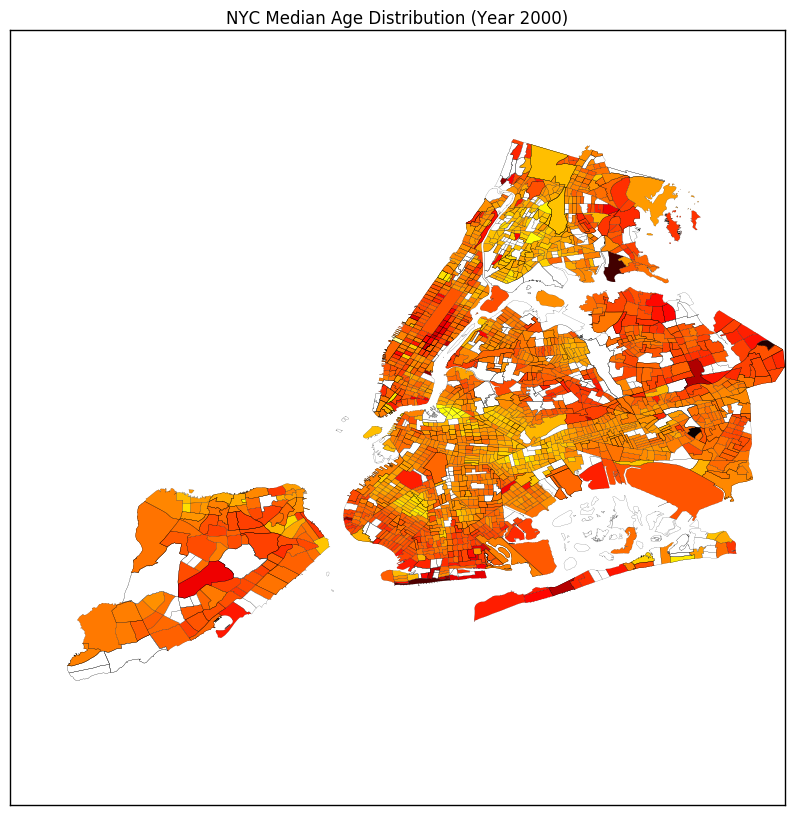

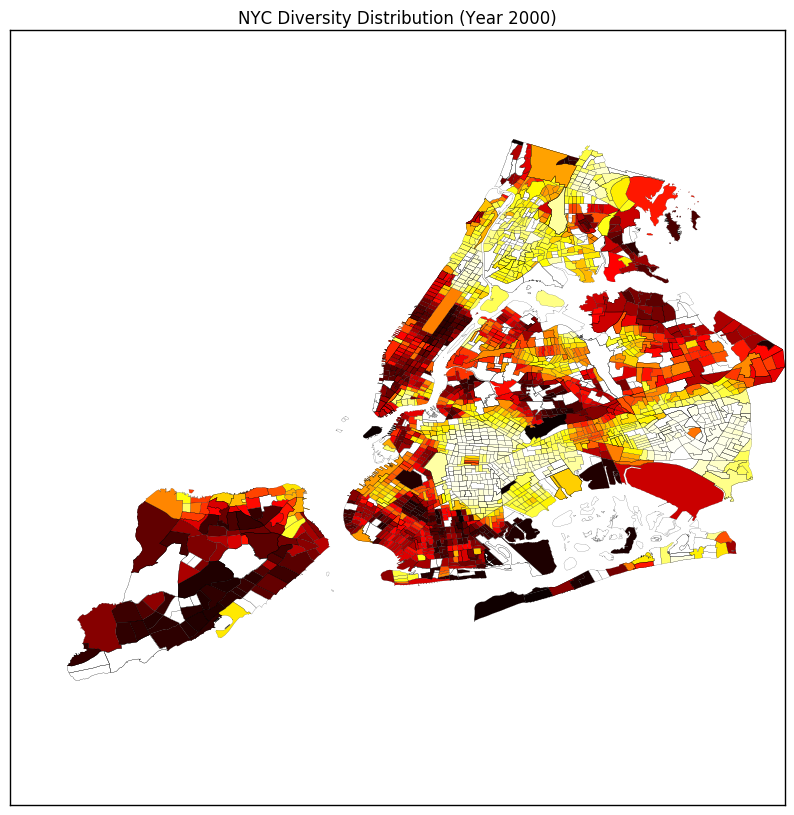

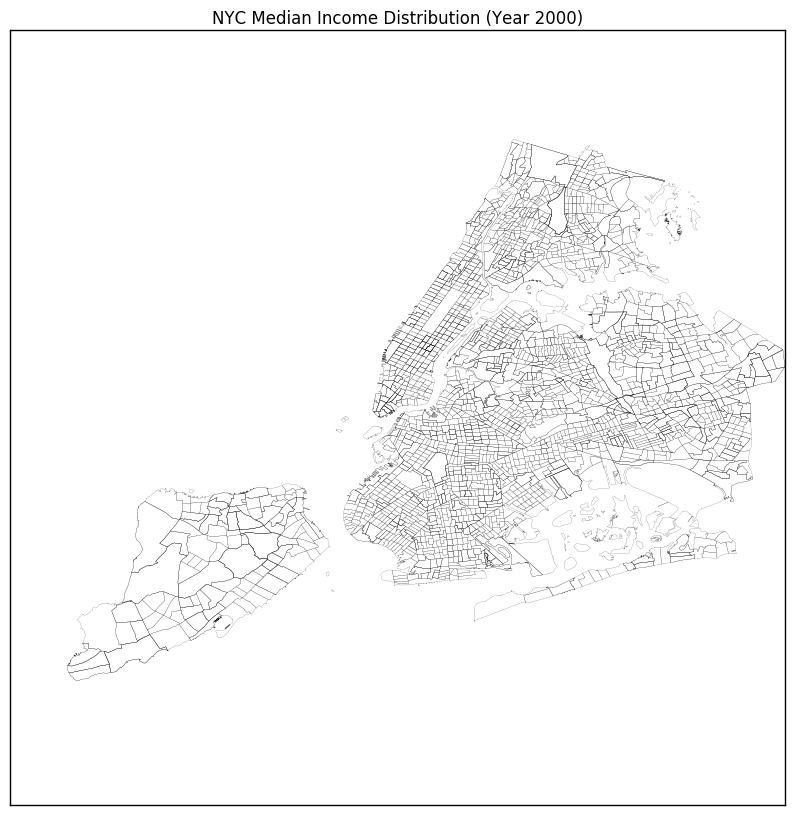

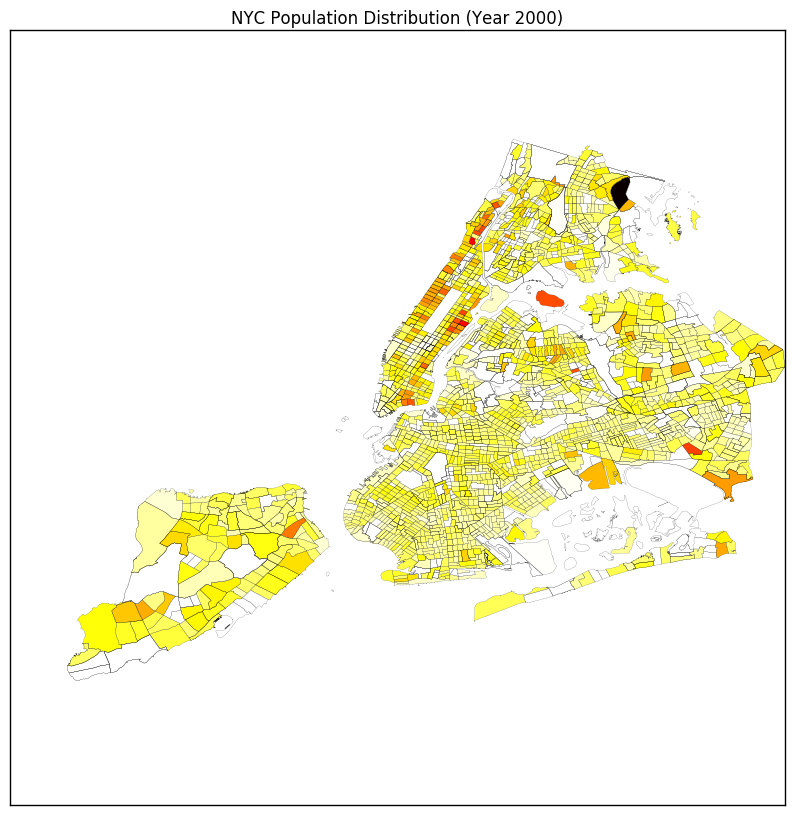

In [88]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df.plot(column='age00', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Median Age Distribution (Year 2000)")

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df.plot(column='diversity00', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Diversity Distribution (Year 2000)")

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df.plot(column='income00', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Median Income Distribution (Year 2000)")

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df.plot(column='population00', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Population Distribution (Year 2000)")


#### Plots for Year 2010

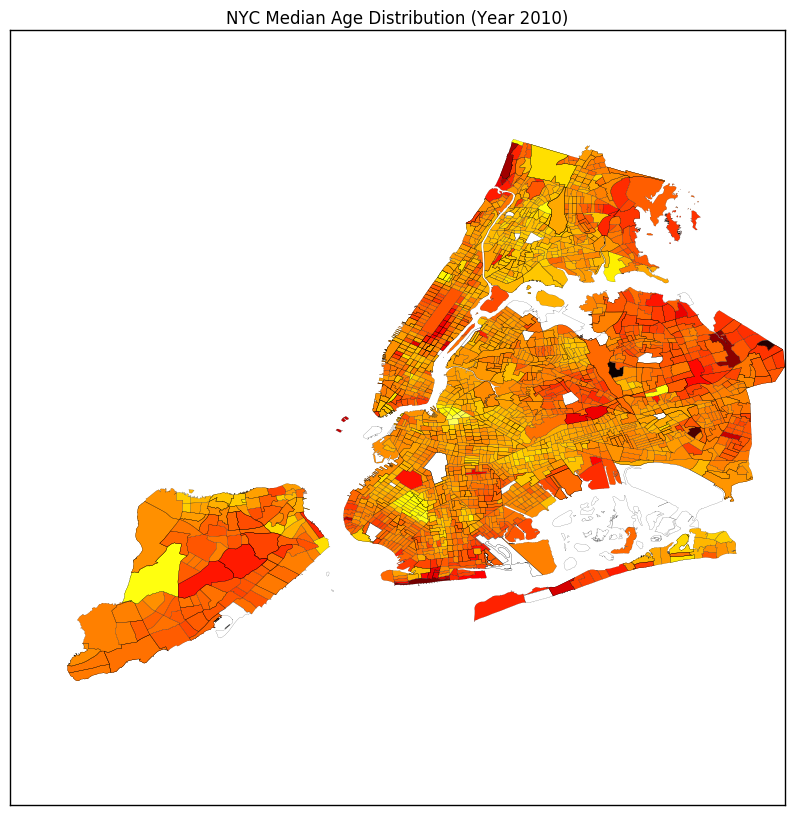

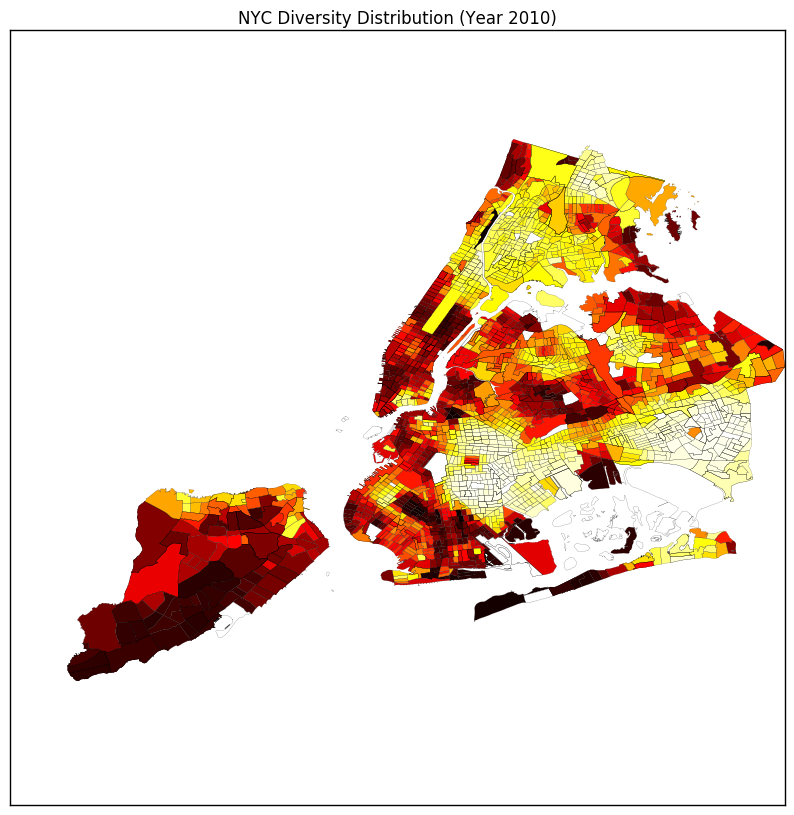

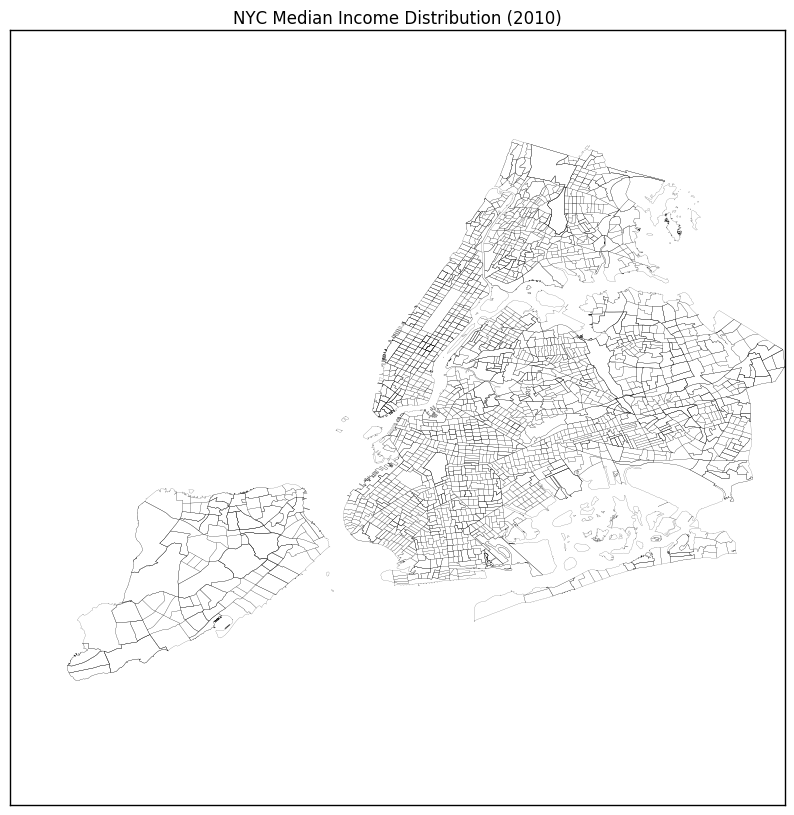

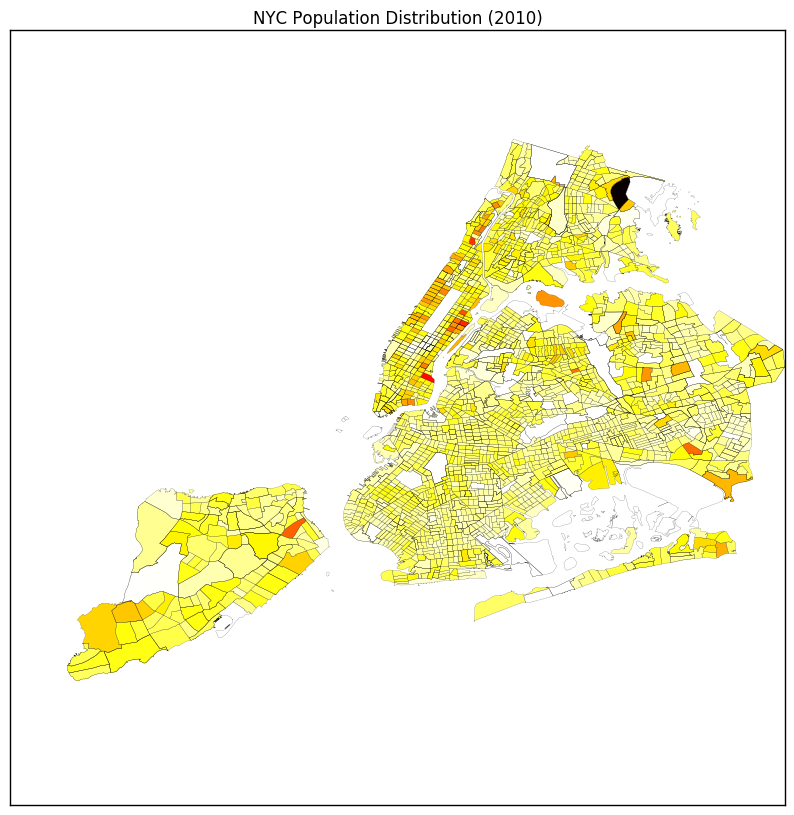

In [89]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df.plot(column='age10', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Median Age Distribution (Year 2010)")

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df.plot(column='diversity10', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Diversity Distribution (Year 2010)")

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df.plot(column='income10', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Median Income Distribution (2010)")

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df.plot(column='population10', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Population Distribution (2010)")

### Difference Plots in Year 2000 and year 2010

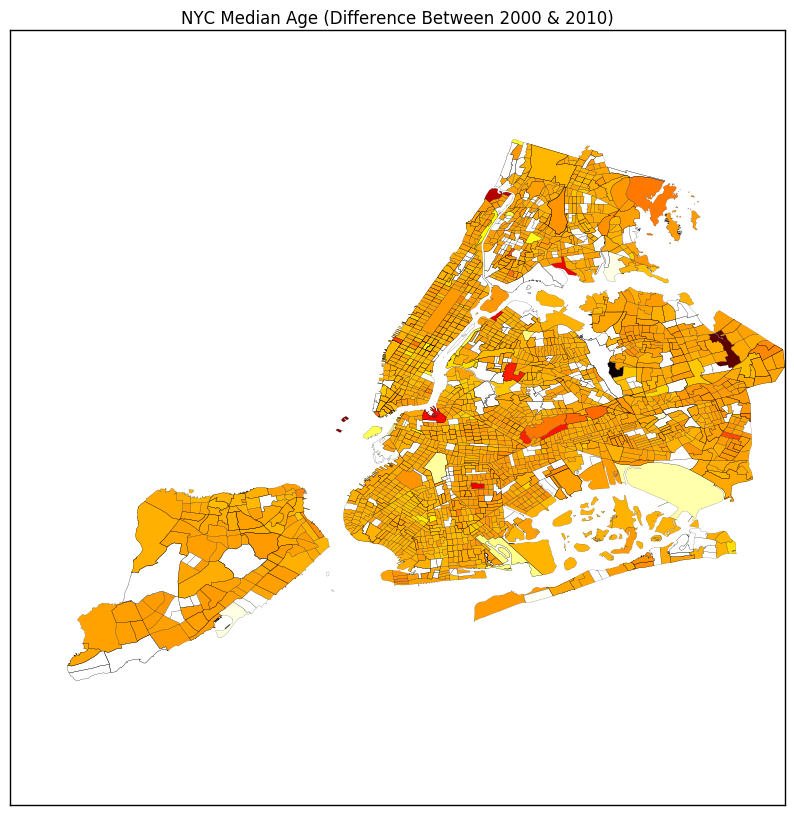

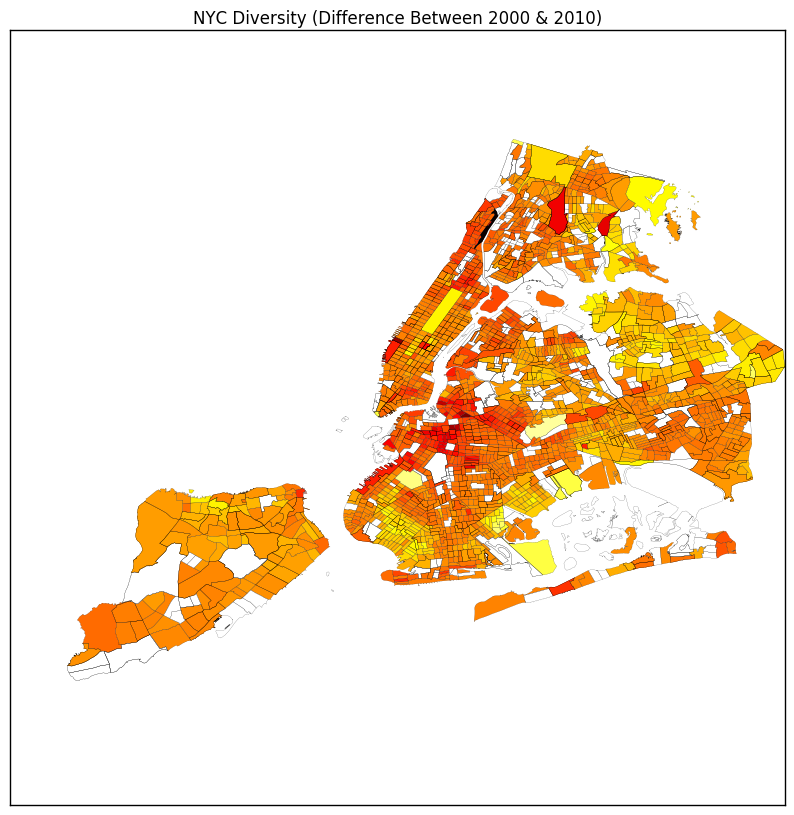

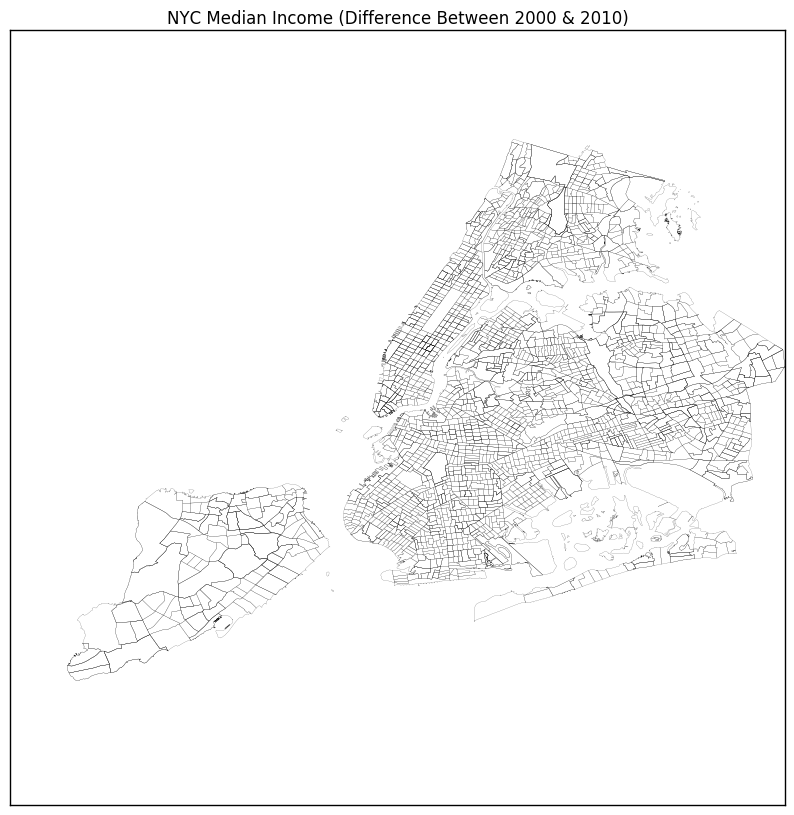

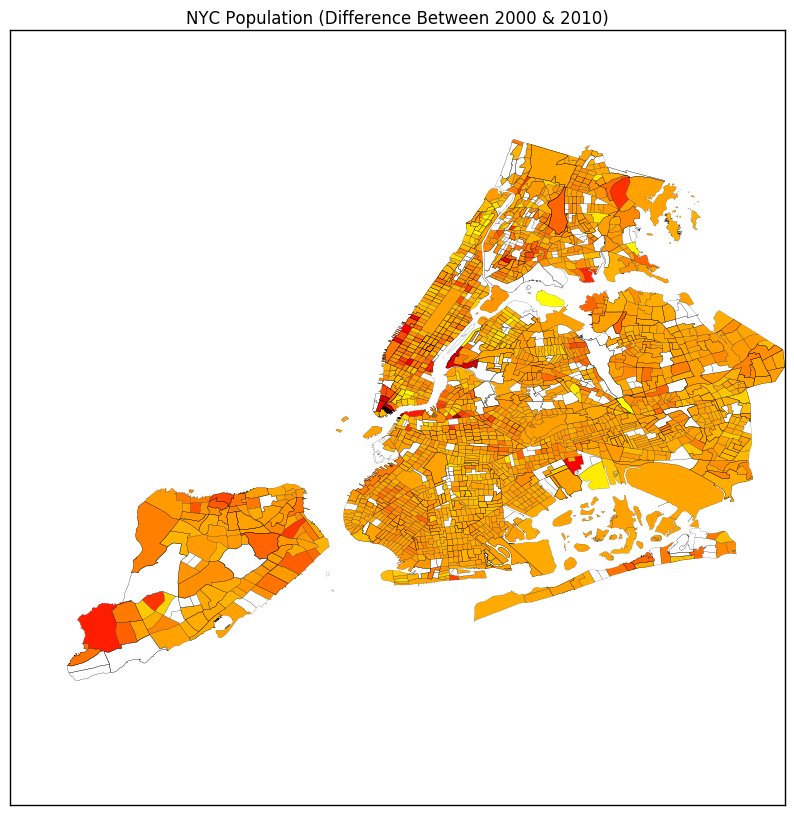

In [90]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df.plot(column='age_diff', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Median Age (Difference Between 2000 & 2010)")

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df.plot(column='diversity_diff', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Diversity (Difference Between 2000 & 2010)")

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df.plot(column='income_diff', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Median Income (Difference Between 2000 & 2010)")

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df.plot(column='population_diff', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Population (Difference Between 2000 & 2010)")

### Analysis Part Based on Zipcode

#### Year 2000 NYC Businesses

In [91]:
df_zip_final.columns

Index([     u'BoroCT2010',        u'BoroCode',        u'BoroName',
            u'CDEligibil',          u'CT2010',         u'CTLabel',
               u'NTACode',         u'NTAName',            u'PUMA',
            u'Shape_Area',      u'Shape_Leng',        u'geometry',
                 u'age00',     u'diversity00',        u'income00',
          u'population00',           u'age10',     u'diversity10',
              u'income10',    u'population10',        u'age_diff',
        u'diversity_diff',     u'income_diff', u'population_diff',
            u'bus_dens00',      u'bus_dens10',        u'bus_diff'],
      dtype='object')

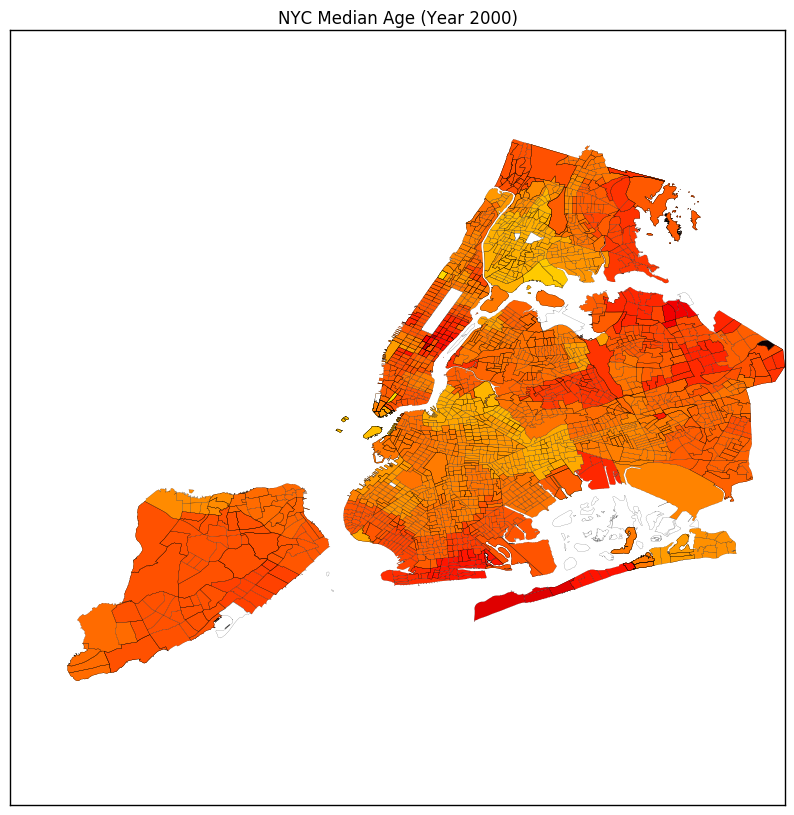

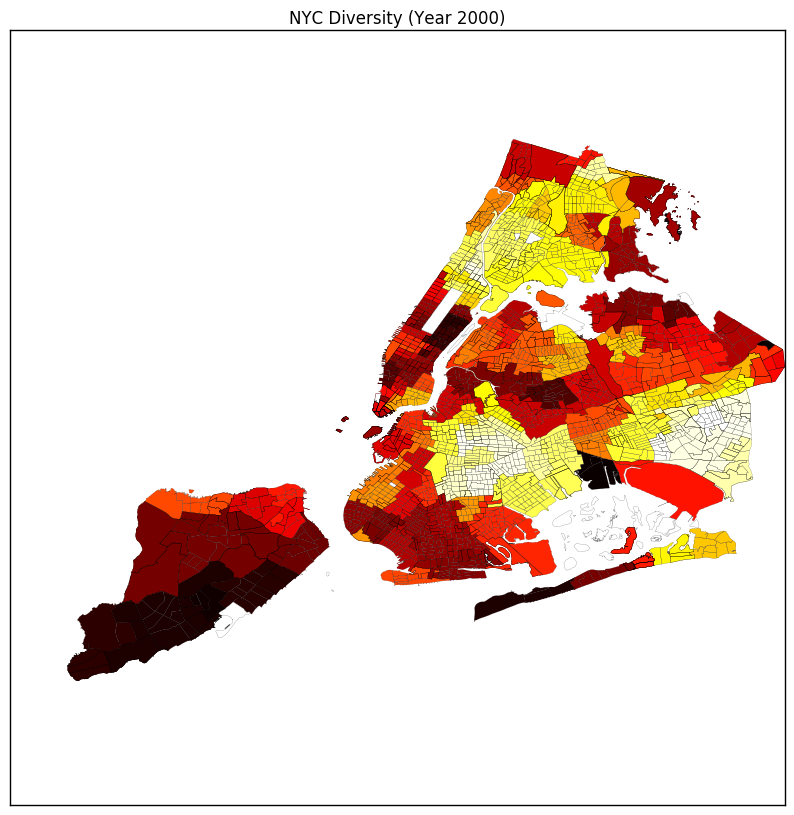

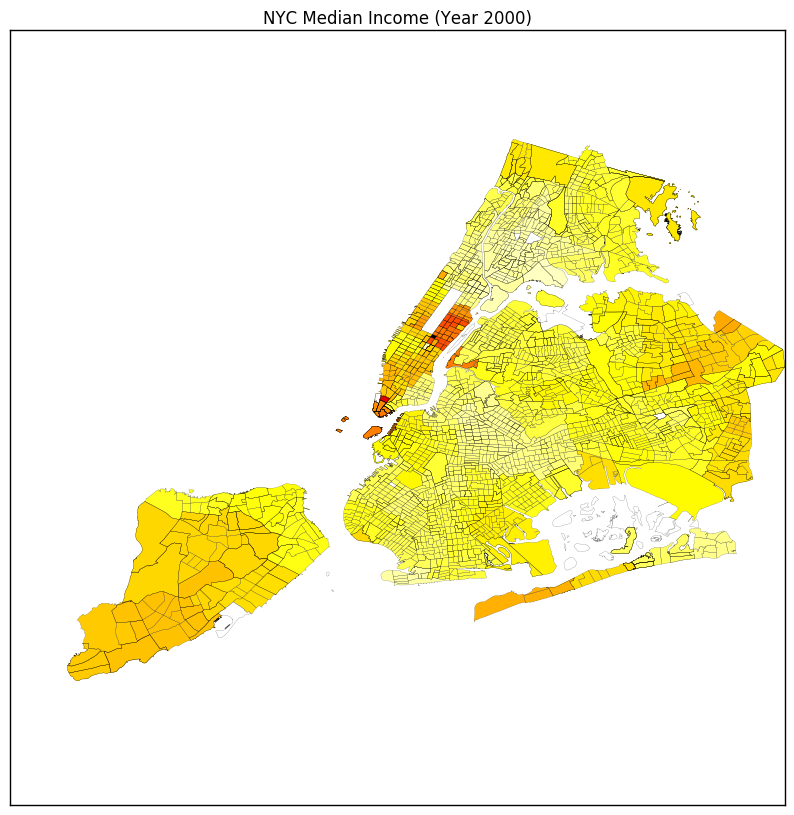

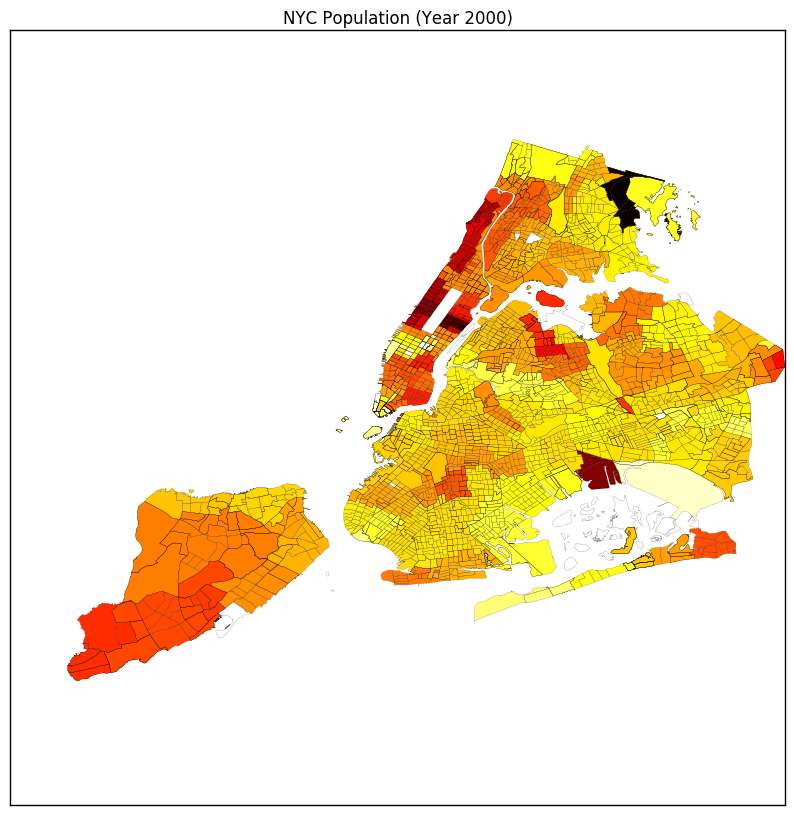

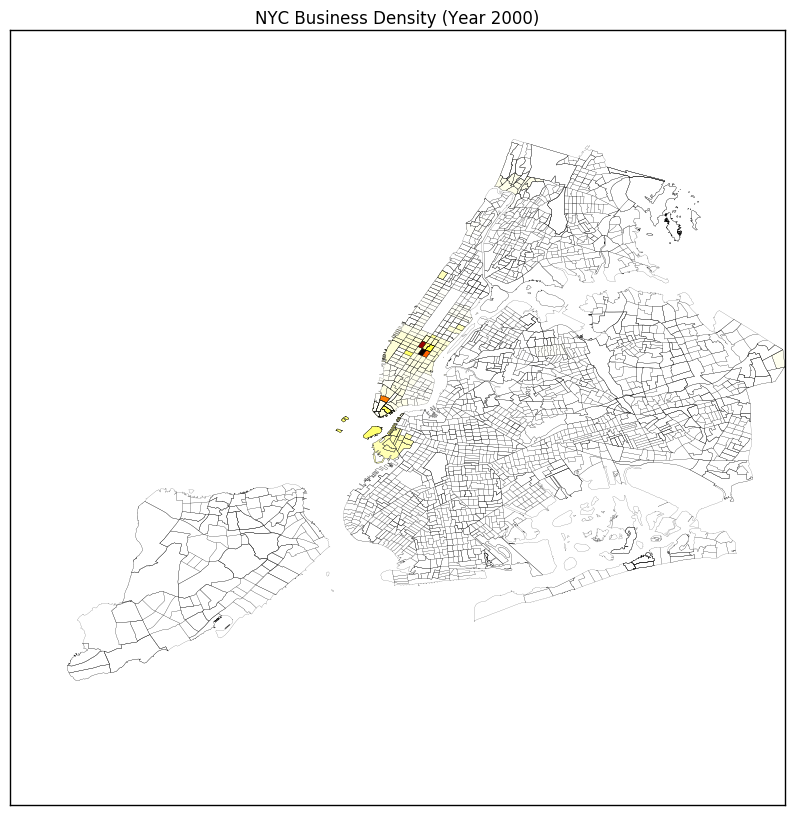

In [93]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df_zip_final.plot(column='age00', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Median Age (Year 2000)")

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df_zip_final.plot(column='diversity00', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Diversity (Year 2000)")

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df_zip_final.plot(column='income00', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Median Income (Year 2000)")

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df_zip_final.plot(column='population00', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Population (Year 2000)")

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df_zip_final.plot(column='bus_dens00', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Business Density (Year 2000)")

#### Year 2010 NYC Businesses

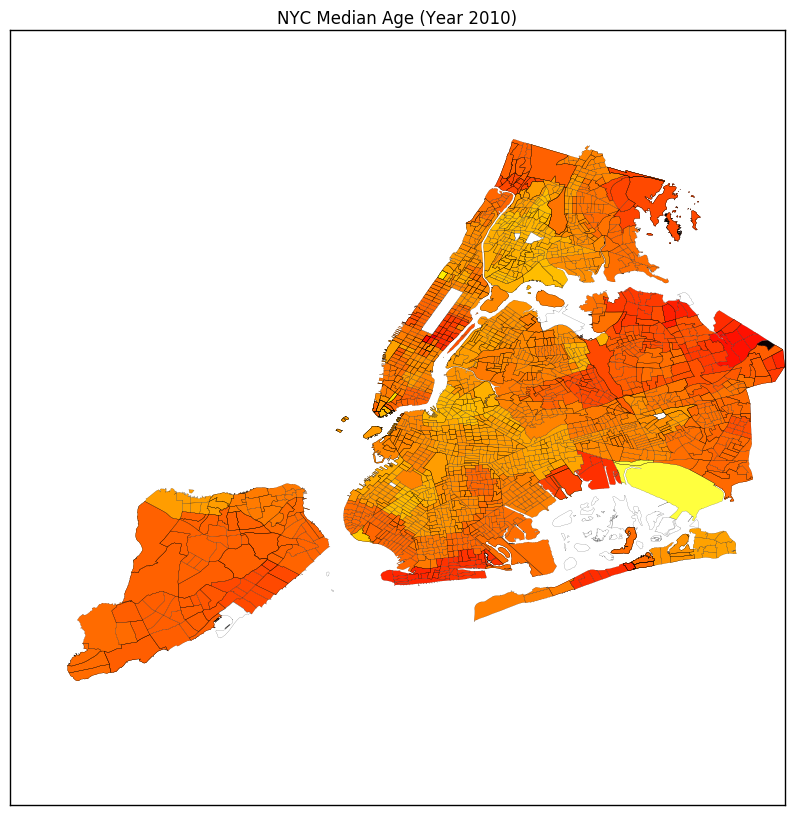

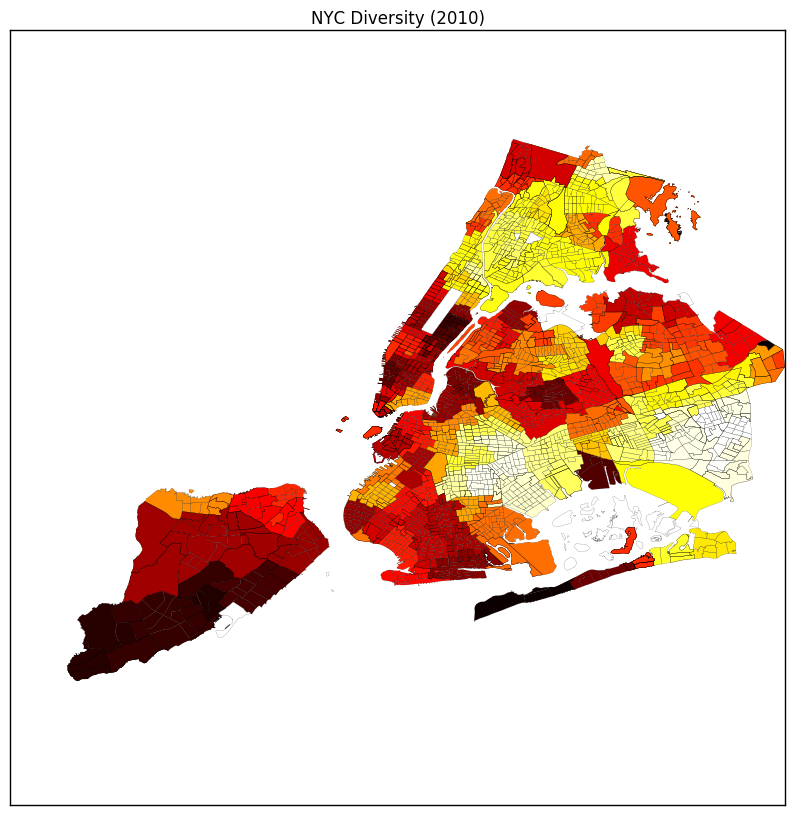

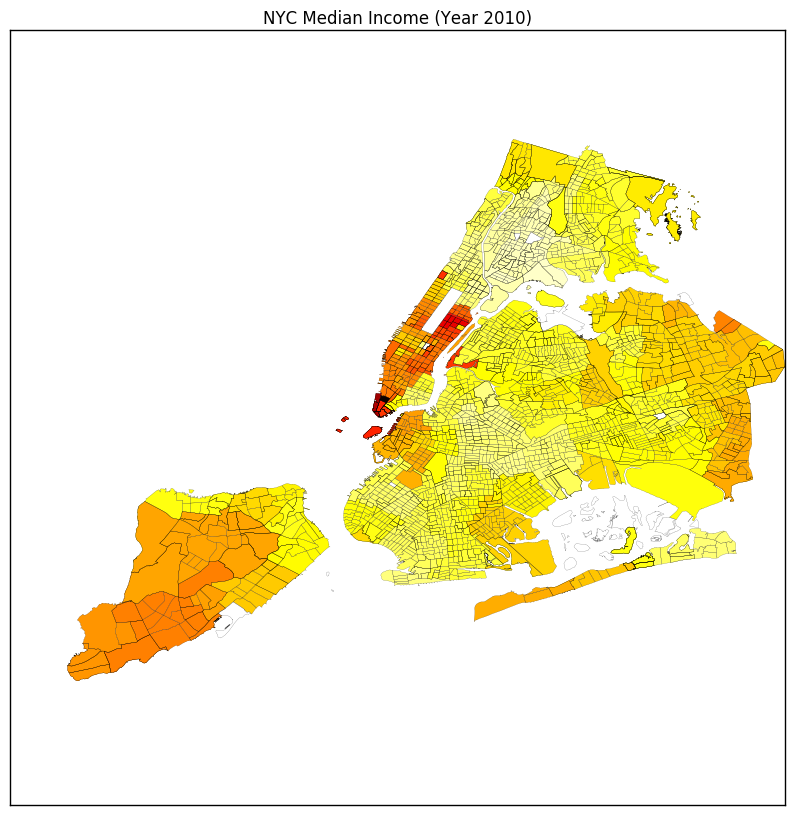

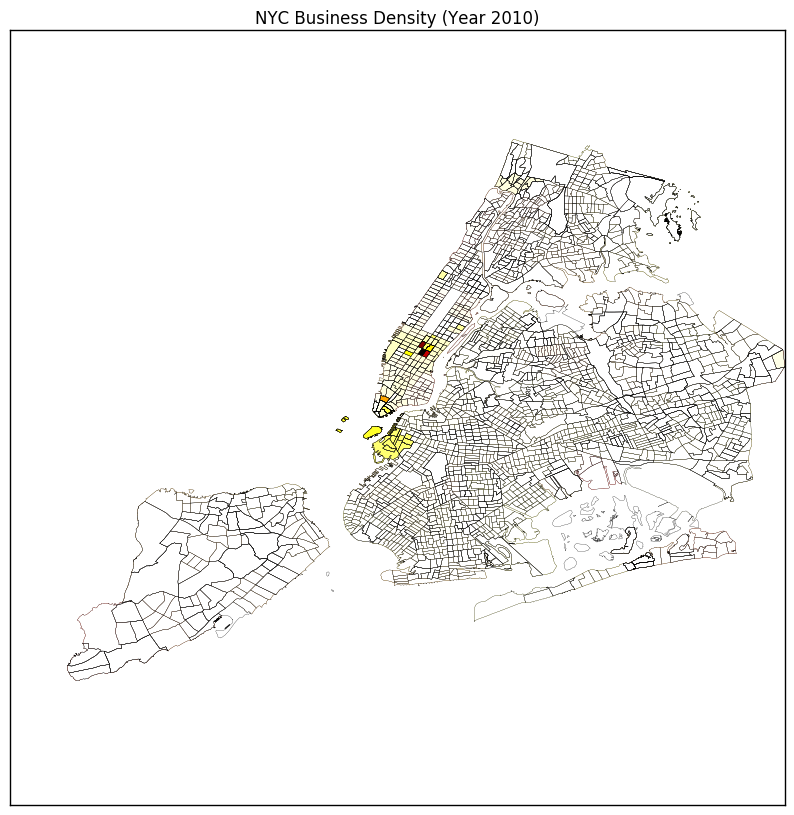

In [94]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df_zip_final.plot(column='age10', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Median Age (Year 2010)")

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df_zip_final.plot(column='diversity10', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Diversity (2010)")

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df_zip_final.plot(column='income10', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Median Income (Year 2010)")

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df_zip_final.plot(column='population10', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Population (Year 2010)")

df_zip_final.plot(column='bus_dens10', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("NYC Business Density (Year 2010)")

#### NYC Differences Between Years 2000 and 2010

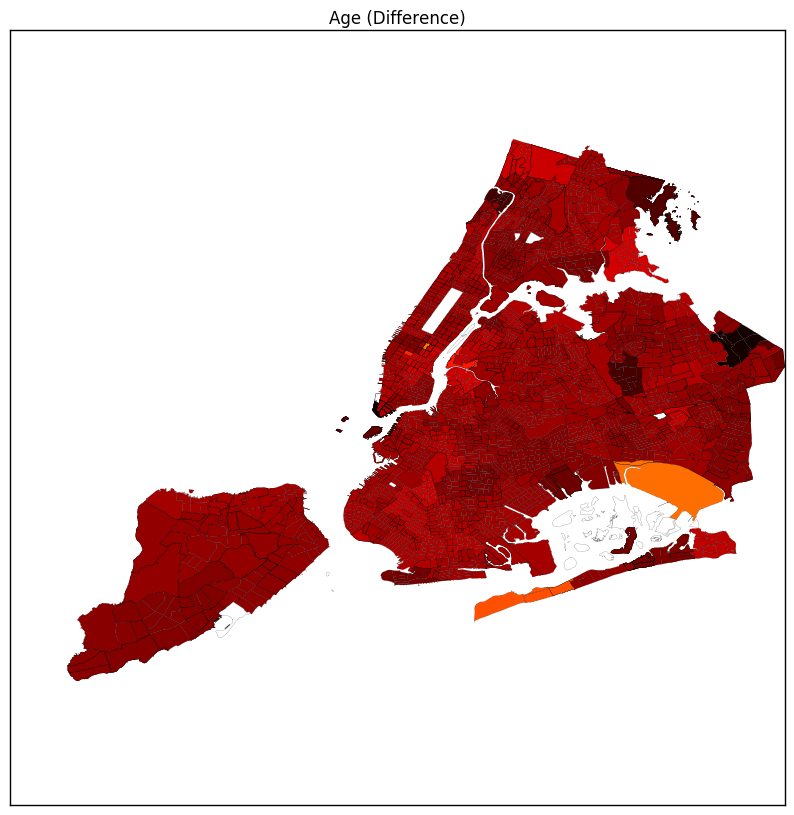

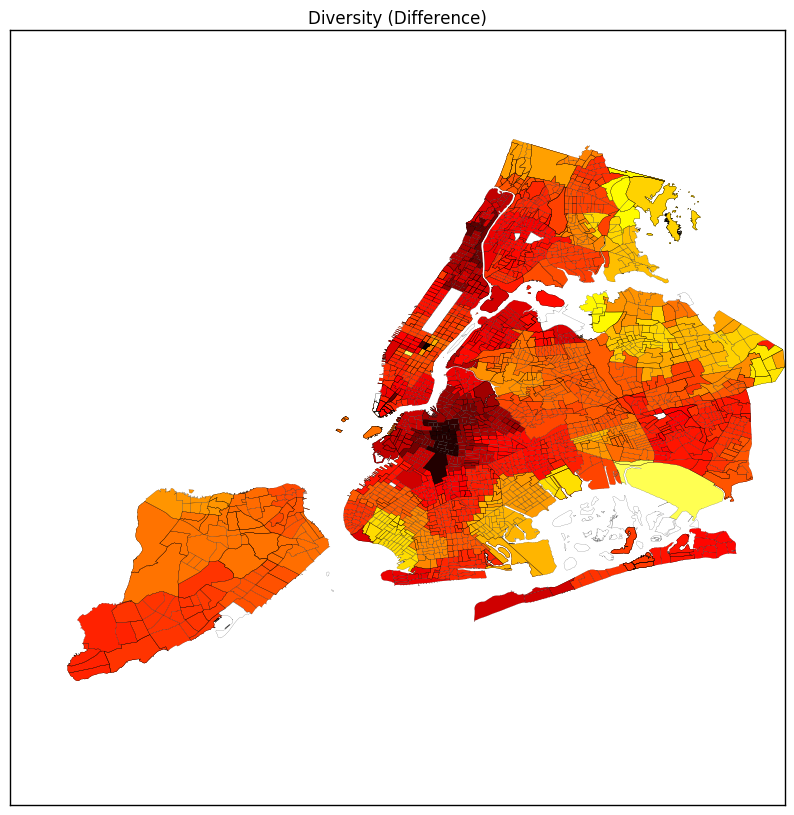

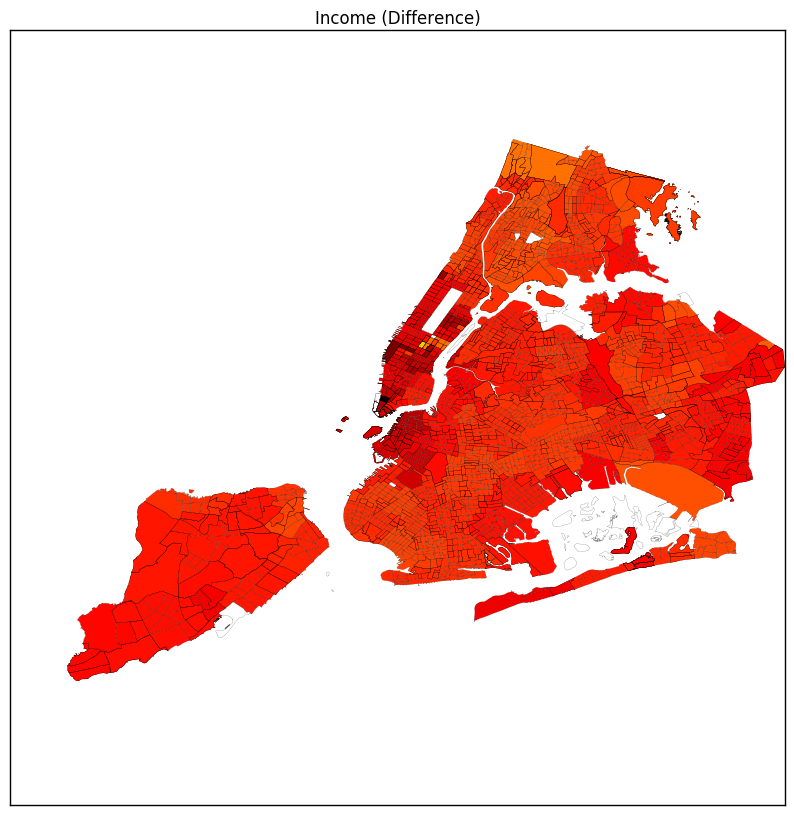

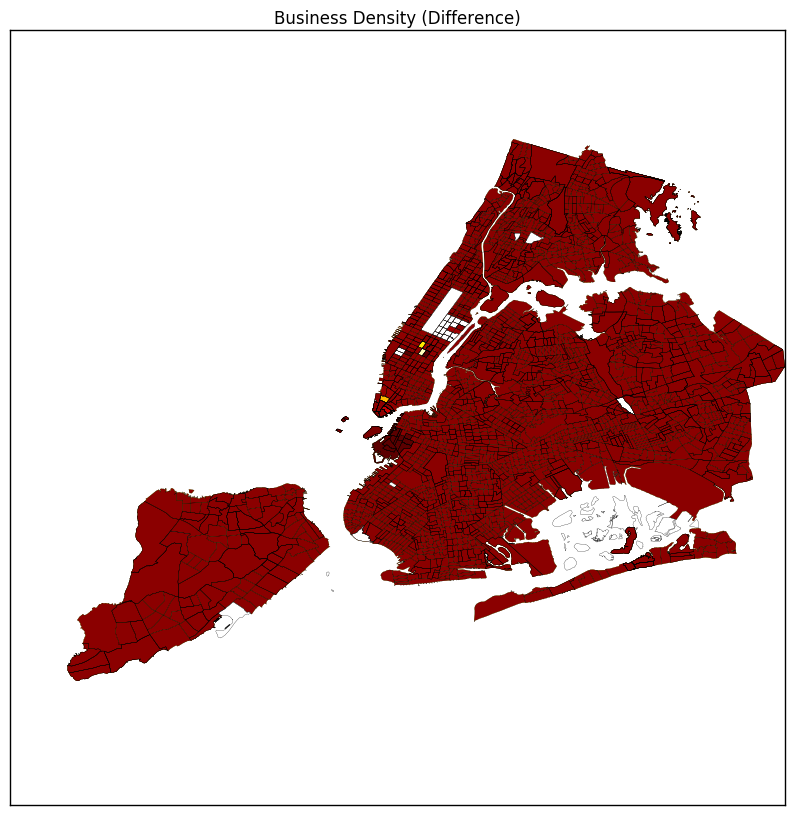

In [96]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df_zip_final.plot(column='age_diff', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("Age (Difference)")

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df_zip_final.plot(column='diversity_diff', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("Diversity (Difference)")

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df_zip_final.plot(column='income_diff', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("Income (Difference)")

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

df_zip_final.plot(column='population_diff', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("Population (Difference)")

df_zip_final.plot(column='bus_diff', colormap='hot_r', alpha=1, linewidth=0.1, ax=ax)
plt.title("Business Density (Difference)")

#### END

### Comments and Observations

#### Year 2000

It is difficult to rely on this data to make conculusions about socioeconomic factors of NYC since the data presented here may need futher debugging and wrangling work. However, some of the information demonstrated through the plots here can be interpereted as an indicator for changes of cultural and economic factors between 2000 and 2010. The median age, population and diversity seem segregated and condensed to areas like midtown and downtown Manhattan, Park slope Brooklyn and certain areas between Brooklyn and Queens during year 2000 whereas, these factors seem more evenly distributed in 2010. There are areas like Downtown Brooklyn and Uppper Manhattan showing higher density of distribution in 2010 as compared to 2000. Also, Long Island City and Brooklyn areas previously zoned as manufacturing in 2000 seem now populated. Moreover, the median income only plotted at 2010 zipcode level and indicate wider income difference in Midtown and Downtown Manhattan as well as Downtown Brooklyn area.  The business density in 2000 shows mostly white whereas with some business activities in Midtown and Downtown Manhattan. 